In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
import numpy as np 
import os 


2023-04-03 17:01:25.525525: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 17:01:26.603266: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/abk/miniconda3/envs/tf/lib/
2023-04-03 17:01:26.603792: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/abk/miniconda3/envs/tf/lib/
2023-04-03 17:01:26.603808: W tensorflow/compiler/tf2tensorr

In [2]:
# class_names = ['bird', 'elephant', 'person', 'wild_boar']
class_names = ['bird', 'elephant', 'person', 'undetected', 'wild_boar']
img_height , img_width , color_mode = 180,180,"grayscale"


2023-04-03 17:01:28.164729: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 17:01:28.173349: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 17:01:28.173655: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-03 17:01:28.174114: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

2023-04-03 17:01:29.800743: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100


1/1 [==============================] - 1s 1s/step
[1.0226966e-03 1.6207105e-02 9.6985573e-01 6.7736604e-05 1.2846717e-02]
animal : bird | accuracy :  0.1
animal : elephant | accuracy :  1.62
animal : person | accuracy :  96.99
animal : undetected | accuracy :  0.01
animal : wild_boar | accuracy :  1.28


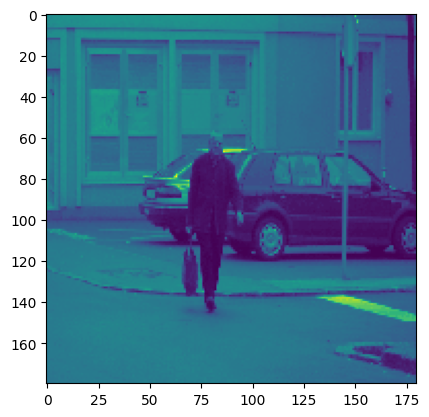

In [3]:
img = tf.keras.utils.load_img(
    "test/h1.png",
    target_size = (img_height,img_width),
    color_mode = color_mode 
)

# model = tf.keras.models.load_model('./m(e-15)-0.821-(h-det,ud).h5')
model = tf.keras.models.load_model('./m(e-15)-0.821-(h-det,ud).h5')

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0) # Create a batch
print(model)
predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])
score = predictions[0]

print(predictions[0])

print(f"animal : {class_names[0]} | accuracy :  {round(np.array(score)[0] * 100,2)}")
print(f"animal : {class_names[1]} | accuracy :  {round(np.array(score)[1] * 100,2)}")
print(f"animal : {class_names[2]} | accuracy :  {round(np.array(score)[2] * 100,2)}")
if len(class_names) > 3 :
    print(f"animal : {class_names[3]} | accuracy :  {round(np.array(score)[3] * 100,2)}")
if len(class_names) > 4 :
    print(f"animal : {class_names[4]} | accuracy :  {round(np.array(score)[4] * 100,2)}")
plt.imshow(img)


1/1 [==============================] - 0s 22ms/step


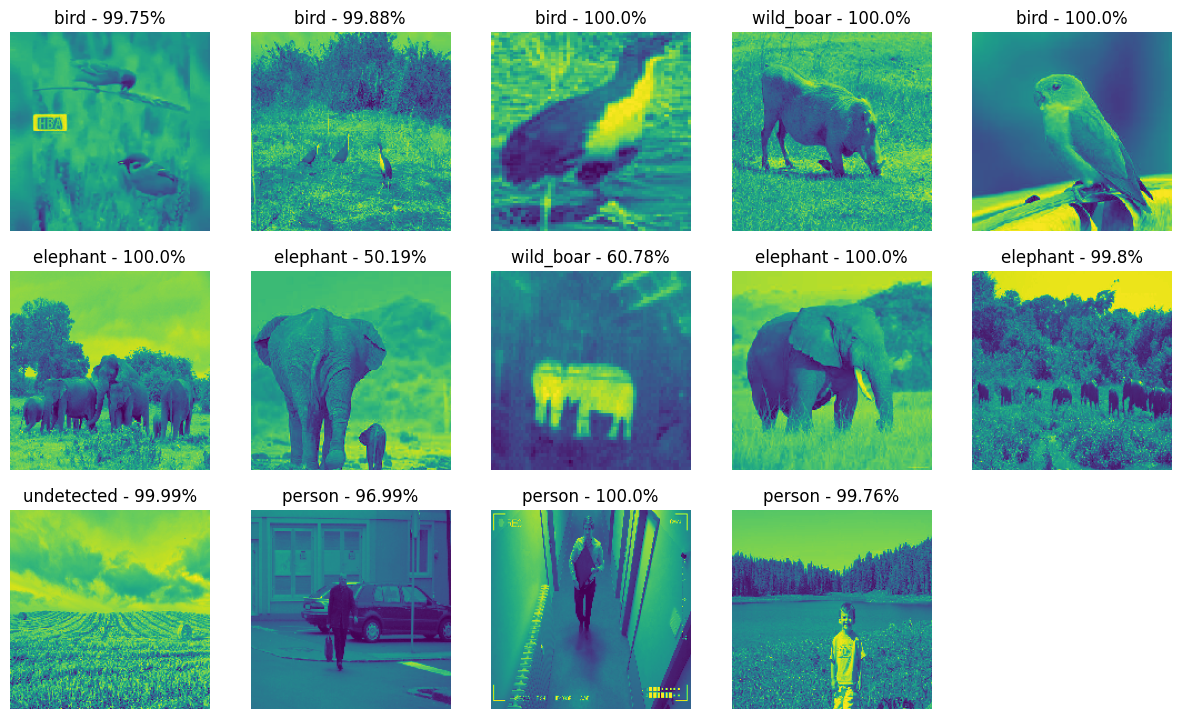

In [4]:
plt.figure(figsize=(15, 15))

for i,file in enumerate(os.listdir('test')):
    img = tf.keras.utils.load_img(
    f'test/{file}',
    target_size = (img_height,img_width),
    color_mode = color_mode 
    )


    img_array = tf.keras.utils.img_to_array(img)

    img_array = tf.expand_dims(img_array, 0) # Create a batch
    predictions = model.predict(img_array)
    # score = tf.nn.softmax(predictions[0])
    score = predictions[0]
    # print(score)

    ax = plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    s = round(np.array(score)[0] * 100,2) 
    plt.title(f"{class_names[score.argmax()]} - {round(np.max(score) * 100,2)}%" )
    plt.axis("off")